# Machine Learning

# Taller 01: Primeros Pasos en Machine Learning 

Desarrolado por: &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; AAD Henry Paulett Ramirez </br></br>
Correo: &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  &nbsp; &nbsp; &nbsp;  pcishpau@upc.edu.pe </br></br>
Objetivo del taller: </br>
- Analizar el caso expuesto por un dataset de Kaggle </br>
- Realizar la carga de un dataset via github </br>
- Explorar el dataset y sus principales caracteristicas </br>

## 1.1 Introduccion del caso

### Descripción de la fuente del dataset

El data set Wine Quality fue porporcionado por el usuario Raj Parmar hace 7 años en Kaggle mediante el siguiente link [](https://www.kaggle.com/datasets/rajyellow46/wine-quality): https://www.kaggle.com/datasets/rajyellow46/wine-quality.  
Para asegurar la disponibilidad online, se optó por descargar el archivo en formato CSV y cargarlo a un proyecto de github, a fin de obtener el link del archivo raw [](https://raw.githubusercontent.com/antitesis/wine-quality-dataset/refs/heads/main/winequality.csv): https://raw.githubusercontent.com/antitesis/wine-quality-dataset/refs/heads/main/winequality.csv

### Descripción del problema a resolver

El problema planteado es la predicción de la calidad del vino en función de sus características (variables de entrada). Dado que la variable de salida (calidad del vino) es un numero entero, nos encontramos ante un problema de aprendizaje supervisado por regresión.  
Las variables de entrada son las siguientes:    
1. Type: Tipo de vino (blanco o rojo)
2. Fixed acidity: Acidez fija del vino  
3. Volatile acidity: Acidez volátil del vino
4. Citric acid: Acidez cítrica del vino
5. Residual sugar: Azucar residula del vino
6. Chlorides: cloruros presentes en el vino
7. Free sulfur dioxide: dióxido de azufre libre en el vino
8. Total sulfur dioxide: dióxido de azufre total en el vino
9. Density: densidad del vino
10. PH: PH del vino
11. Sulphates: sulfatos presentes en el vino
12. Alcohol: grado alcoholico del vino

La variable de salida es Quality: calidad del vino (puede tomar valores entre 0 y 10).  

Dado que la calidad es una puntuación basada en data sensorial (posiblemente de un jurado experto), el modelo puede ser empleado para facilitar el calculo de dicha característica sin tener que recurrir al factor humano, lo que ahorraria costes. Adicionalmente, esta variable de salida puede ser empleada por los productores de vino e intermediarios para ayudar a calcular el precio de venta, bajo la premisa de que los vinos de mayor calidad son más costosos.  

Para poder generar el modelo, se recurrirá a la revisión de campos (cantidad y distribución), transformación de características (todas deben ser numéricas), construcción y entrenamiento del modelo, asi como el testing, interpretación de resultados y ejecución de correcciones en el modelo de ser necesario.

## 1.2 Desarrollo del caso

### Importación de librerias necesarias

In [1]:
#Para esta actividad se instalarán las siguientes librerías:
%pip install pandas matplotlib numpy seaborn -q

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#Para esta actividad se importaran las siguientes librerías:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Carga del Dataset

GitHub permite alojar pequeños datasets en la nube, pero algunas consideraciones importantes que se debe tener en cuenta las limitaciones de tamaño:

<ul><li>Tamaño de archivo individual: GitHub tiene límites en el tamaño de los archivos individuales que puedes subir a un repositorio. Si bien se puede subir archivos de hasta 100 MB directamente, se recibirá una advertencia al intentar subir archivos mayores a 50 MB. Para archivos más grandes, se recomienda utilizar Git Large File Storage (LFS). </li>
<li>Tamaño total del repositorio: Si bien no hay un límite estricto para el tamaño total de un repositorio, se recomienda mantener los repositorios pequeños, idealmente por debajo de 1 GB, y se recomienda encarecidamente que sean inferiores a 5 GB. Los repositorios más pequeños se clonan más rápido y son más fáciles de manejar.</li></ul>

In [3]:
#Código para cargar el Dataset
url = 'https://raw.githubusercontent.com/antitesis/wine-quality-dataset/refs/heads/main/winequality.csv'
df = pd.read_csv(url)

#Revisión de resultados
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Caracterización del Dataset

Antes de empezar a trabajar con un dataset para la creación de modelos de machine learning es necesario analizar algunas de sus caracteristicas, por ejemplo:

>- Número de instancias en total.
>- Número de atributos de entrada, su significado y tipo.
>- Estadísticas de la variable objetivo.
>- Estadísticas los atributos en relación con la variable objetivo.

El análisis puede realizarse mediante tablas o en modo gráfico (p.ej., histogramas, diagramas de dispersión, diagramas de cajas y bigotes, etc.)

In [4]:
#Revisión de tipo de datos de las variables de entrada y objetivo
df.info()
print()

#Evaluando dimensión del dataset (numero de filas y columnas) con la funcion shape
print("El dataset tiene", df.shape[0], "instancias y", df.shape[1], "columnas.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB

El dataset tiene 6497 instancias y 13 columnas.


In [5]:
#Análisis de campos nulos
conteo_null = df.isnull().sum()
print("Numero de valores nulos por columna: ")
print(conteo_null)

Numero de valores nulos por columna: 
type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64


In [6]:
#Análisis de variables de entrada (numericos)
dfnum = df.drop(['type', 'quality'], axis=1)
dfnum.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


<Figure size 1500x1000 with 0 Axes>

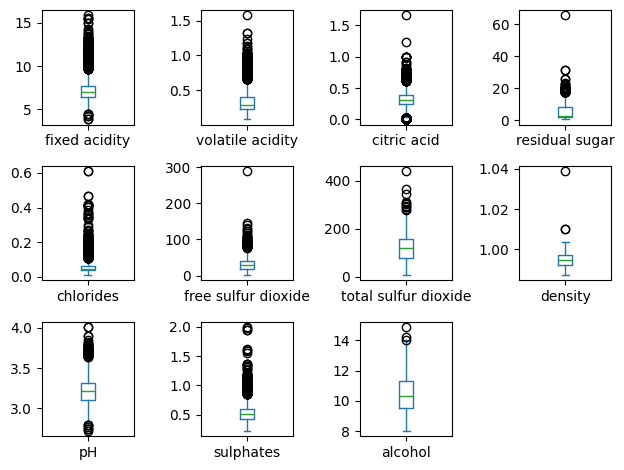

In [7]:
#Se visualiza la distribución de datos numéricos mediante un grafico de cajas y velas para cada variable numerica
# Ajustamos el tamaño de cada figura
plt.figure(figsize=(15, 10))  

#Se crea un grupo de graficos de cajas y velas
dfnum.plot(kind='box', subplots=True, layout=(3, 4), sharex=False, sharey=False)

#Se ajusta el formato de ejes para cada subgrafico
for ax in plt.gcf().axes:
    ax.set_xlabel(ax.get_xlabel(), fontsize=14) 
    ax.set_ylabel(ax.get_ylabel(), fontsize=14)

#Se ajusta el diseño de los subplots
plt.tight_layout()

#Se muestra el gráfico
plt.show()

In [8]:
# Función para calcular el porcentaje de outliers para cada variable numérica
def calcular_porcentaje_outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    
    # Definimos los límites para considerar un valor como outlier
    outliers = col[(col < Q1 - 1.5 * IQR) | (col > Q3 + 1.5 * IQR)]
    
    porcentaje = len(outliers) / len(col) * 100
    return porcentaje

# Aplicar la función a todas las columnas y almacenar los resultados
porcentajes_outliers = {}
for columna in dfnum.columns:
    porcentajes_outliers[columna] = calcular_porcentaje_outliers(dfnum[columna])

# Imprimir los resultados
for columna, porcentaje in porcentajes_outliers.items():
    print(f"La columna '{columna}' tiene un {porcentaje:.2f}% de outliers.")

La columna 'fixed acidity' tiene un 5.49% de outliers.
La columna 'volatile acidity' tiene un 5.79% de outliers.
La columna 'citric acid' tiene un 7.82% de outliers.
La columna 'residual sugar' tiene un 1.82% de outliers.
La columna 'chlorides' tiene un 4.40% de outliers.
La columna 'free sulfur dioxide' tiene un 0.95% de outliers.
La columna 'total sulfur dioxide' tiene un 0.15% de outliers.
La columna 'density' tiene un 0.05% de outliers.
La columna 'pH' tiene un 1.12% de outliers.
La columna 'sulphates' tiene un 2.94% de outliers.
La columna 'alcohol' tiene un 0.05% de outliers.


In [9]:
#Análisis de variables de entrada (nominales)
#Revisando el numero e instancias pertenecientes a cada clase de la variable objetivo con la función size()
print("Numero de instancias pertenecientes a cada clase de la variable de entrada nominal:")
print(df.groupby('type').size())

Numero de instancias pertenecientes a cada clase de la variable de entrada nominal:
type
red      1599
white    4898
dtype: int64


Numero de instancias pertenecientes a cada clase de la variable objetivo:
quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
dtype: int64



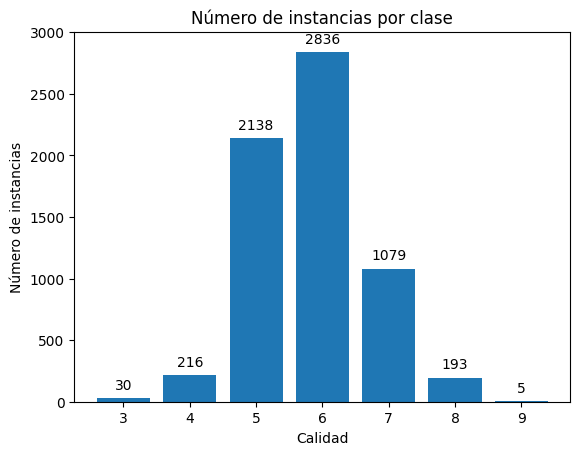

In [10]:
#Análisis de variable objetivo
print("Numero de instancias pertenecientes a cada clase de la variable objetivo:")
print(df.groupby('quality').size())
print()

#Imprimiendo el numero de instancias pertenecientes a cada clase de la variable objetivo en un grafico de barras
#Uso de value_counts() para contar los valores de cada clase
conteoclases = df["quality"].value_counts()
#Uso de pltbar() para ingresar indices(etiquetas de clase) y valores(conteo) de conteoclases
plt.bar(conteoclases.index , conteoclases.values)
#Posiciona las etiquetas ligeramente por encima de las barras y con un pequeño offset hacia la izquierda
for i in range(len(conteoclases.index)):
    plt.text(conteoclases.index[i], conteoclases.values[i] + 50, conteoclases.values[i], ha='center', va='bottom', fontsize=10)
#Personalizacion del gráfico
plt.title("Número de instancias por clase")
plt.xlabel("Calidad")
plt.ylabel("Número de instancias")
plt.xticks(conteoclases.index)
plt.ylim(0, 3000)  # Ajusta el límite superior del eje y
plt.show()

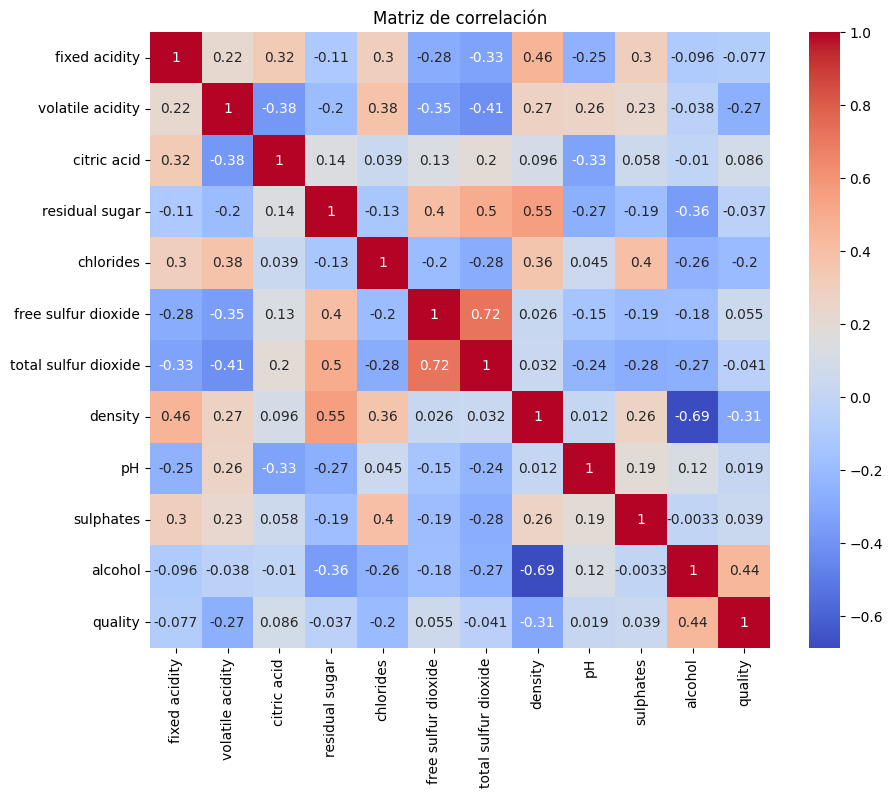

In [11]:
#Matriz de correlación de variables
df_numeric = df.select_dtypes(include=[np.number])
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

## 1.3 Conclusiones del Análisis

El dataset cuenta con 6497 registros, 12 atributos de entrada y uno objetivo, de tipo numérico: calidad de vino (quality), que se encuentra en la escala del 1 al 10. Si bien el concepto de "desbalanceo de clases" se aplica a problemas de clasificación, en el caso de regresión, podremos decir que contamos con dos problemas relacionados a dicho aspecto:
- Distribución sesgada de la variable objetivo: La variable objetivo tiene una distribución muy asimétrica, con muchos valores concentrados en un rango y pocos en otro, , lo que ocasiona que el modelo podría tener dificultades para predecir correctamente los valores en la región menos representada.
- Falta de datos en ciertos rangos: Dado que hay pocos datos disponibles en los rangos de la variable objetivo iniciales y finales, el modelo podría no aprender correctamente las relaciones en esas regiones y, por lo tanto, tener dificultades para predecir valores en esos rangos. <br> 

Con la excepción del atributo type (tipo de vino), todos los atributos de entrada son de tipo numérico (decimal), lo cual implica que la columna type deberá ser transformada a tipo numérico para que pueda ingresar como atributo de entrada del modelo. Asimismo, como la cantidad de nulos en el dataset es menor al 1% del total de datos, se optará por eliminar los registros que contengan un valor nulo. Todos las columnas presentan datos atípicos, con una proporción entre 0.05% y 7.82%. Inicialmente no se optará por eliminarlos para evitar mayores perdidas de información. <br><br>
Según la matriz de correlación, no existen variables que esten relacionadas estrechamente al atributo de clase de forma directa o indirecta (no hay valores superiores a 0.5 ni inferiores a -0.5). Por tal motivo se contemplarán todos los atributos en la construcción del modelo.

# Taller 02: Aprendizaje Supervisado por Regresión

Desarrolado por: &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; AAD Henry Paulett Ramirez </br></br>
Correo: &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  &nbsp; &nbsp; &nbsp;  pcishpau@upc.edu.pe </br></br>
Objetivo del taller: </br>
- Preprocesamiento de la data para creación de modelo de Regresión </br>
- Entrenamiento y evaluación de modelos de regresión </br>
- Análisis de métricas de desempeño </br>

Nota: Este taller se construye sobre la base del taller 01, por lo que se deberá ejecutar todo el contenido desde el inicio.

## 2.1. Preprocesamiento del dataset

### Importación de librerias necesarias 

In [5]:
#Para esta actividad se instalarán las siguientes librerías:
%pip install scikit-learn  -q
#tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
#Para esta actividad se importaran las siguientes librerías:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


### Limpieza y transformación de datos

Discusión sobre valores vacíos: <br>
- ¿Es necesario tratar los valores vacíos?
- ¿El tratamiento de valores vacios en variables de entrada es el mismo que en variables de salida?
- ¿Que alternativas de tratamiento existen para los valores vacíos?

In [14]:
#Eliminación de registros con valores vacios.
df.dropna(inplace=True)

#Validación de campos nulos
conteo_null_df = df.isnull().sum()
print("Numero de valores nulos por columna: ")
print(conteo_null_df)
print()

#Conteo de total de registros
print("El dataset ahora tiene", df.shape[0], "instancias")

Numero de valores nulos por columna: 
type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

El dataset ahora tiene 6463 instancias


Discusión sobre conversión de variables: 
- ¿Por que deberiamos hacer una conversión de variables nominales a numéricas?
- ¿Que seria mejor aplicar: label encoding o one hot encoding?

In [15]:
#Conversión de variables nominales a numéricas (tipo de vino) mediante diccionario 
tipovino_dict = {'white':1,'red':2}
pd.set_option('future.no_silent_downcasting', True)
df["type"] =  df["type"].replace(tipovino_dict)

Discusión sobre normalización de variables:
- ¿Por qué es necesario normalizar las variables? 
- ¿Que tipos de normalizacion existen?

In [16]:
#Normalización de variables de entrada:
varEntrada = df.drop('quality',axis=1)
varSalida = df['quality']
escalador = MinMaxScaler()
varEntradaEsc = escalador.fit_transform(varEntrada)

## 2.2. Construcción de modelos de regresión

### División del dataset en datos de entrenamiento y datos de test 

In [17]:
#Tras realizar la transformación de las variables nominales en numericas, se dividirá el dataset en variable objetivo (columna quality) y variables de entrada (todas las demás). 
#Además se dividirá el dataset en 80% para training y 20% para testing. Se activará shuffle para que se asignen las instancias a ambos grupos de forma aleatoria
X=varEntradaEsc
Y=varSalida
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=1, shuffle=True)

### Creación de modelos de regresion

Como se puede ver a continuación, las lineas de codigo para la construccion de estos modelos son pocas (incluso el modelo ya creado se prueba en la última linea). Como sugerencia, se puede buscar en internet sobre los hiperparámetros que pueden incluirse dentro de los algoritmos (por ejemplo, DecisionTreeRegressor tiene max_depth=3) para poder agregarlos o modificarlos, y finalmente comparar los resultados. 

In [18]:
#Creación del modelo 1 - Decision Tree Regression 
modeloDTR = DecisionTreeRegressor(max_depth=3)  # Ajusta la profundidad máxima
modeloDTR.fit(x_train, y_train)
y_pred_dtr = modeloDTR.predict(x_test)

Estos son los parámetros que recibe el algoritmo SVR (Support Vector Regression )

- Kernel
    - Opciones:
        - 'linear': Utiliza un kernel lineal.
        - 'poly': Utiliza un kernel polinómico.
        - 'rbf': Utiliza un kernel radial base (RBF).
        - 'sigmoid': Utiliza un kernel sigmoide.
        - 'precomputed': Utiliza una matriz de kernel precalculada.
    - Impacto: Define la función que se utiliza para mapear los datos a un espacio de características de mayor dimensión.
    - Recomendación: El kernel RBF suele ser una buena opción para la mayoría de los problemas, pero puedes experimentar con otros kernels si es necesario.
- C (Regularización)
    - Valor: Un número positivo.
    - Impacto: Controla la penalización por errores en el entrenamiento. Un valor más alto penaliza más los errores, lo que puede llevar a un sobreajuste. Un valor más bajo penaliza menos los errores, lo que puede llevar a un subajuste.
    - Recomendación: Es importante ajustar este hiperparámetro para encontrar un equilibrio entre el ajuste a los datos de entrenamiento y la generalización a datos nuevos.
- Épsilon
    - Valor: Un número no negativo.
    - Impacto: Define el margen de tolerancia para los errores. Los errores dentro de este margen no se penalizan.
    - Recomendación: Un valor más alto permite más errores, lo que puede llevar a un subajuste. Un valor más bajo restringe los errores, lo que puede llevar a un sobreajuste.
- Gamma
    - Valor: Un número positivo o 'scale' o 'auto'.
    - Impacto: Controla el ancho del kernel RBF. Un valor más alto hace que el kernel sea más estrecho, lo que puede llevar a un sobreajuste. Un valor más bajo hace que el kernel sea más ancho, lo que puede llevar a un subajuste.
    - Recomendación: Es importante ajustar este hiperparámetro para el kernel RBF.
- Grado
    - Valor: Un entero.
    - Impacto: Grado del kernel polinómico.
    - Recomendación: Solo se utiliza si se selecciona el kernel polinómico.
- Coef0
    - Valor: Un número.
    - Impacto: Coeficiente independiente en el kernel polinómico y sigmoide.
    - Recomendación: No se utiliza con el kernel lineal.
- Otros hiperparámetros <br>
Además de los hiperparámetros mencionados anteriormente, SVR también tiene otros hiperparámetros que se utilizan con menos frecuencia, como shrinking, tol, cache_size y verbose. Puedes consultar la documentación de scikit-learn para obtener más detalles sobre estos hiperparámetros.

In [19]:
#Creación del modelo 2 - Support Vector Regression 
modeloSVR = SVR(kernel='linear')  # se puede cambiar el kernel a 'poly', 'rbf', etc.
modeloSVR.fit(x_train, y_train)
y_pred_svr = modeloSVR.predict(x_test)

In [20]:
#Creación del modelo 3 - Random Forest (Ensemble Learning)
modeloRF = RandomForestRegressor(n_estimators=100 )
modeloRF.fit(x_train, y_train)
y_pred_rf = modeloRF.predict(x_test)

In [21]:
#Creación del modelo 4 - XGBoost (Ensemble Learning)
modeloXGB = GradientBoostingRegressor(n_estimators=100, max_depth=10, min_samples_leaf=5 )
modeloXGB.fit(x_train, y_train)
y_pred_xgb = modeloXGB.predict(x_test)

## 2.3. Revisión de métricas de desempeño

### Calculo de metricas para regresión: MSE, MAE y R2

Discusión:
- ¿Qué es mejor? ¿Tener mayor o menor MSE? ¿Y en el caso del MAE y R2?
- ¿En qué escala (rango numérico) se encuentran cada una de las métricas señaladas? ¿Por qué se origina esto?
- ¿Qué métrica penaliza más los errores grandes? ¿Qué metrica penaliza errores grandes y pequeños por igual?

In [22]:
#Código para mostrar la evaluación de los modelos

mse_dtr = mean_squared_error(y_test, y_pred_dtr)
mae_dtr = mean_absolute_error(y_test, y_pred_dtr)
r2_dtr = r2_score(y_test, y_pred_rf)

print(f" MAE (Decision Tree Regression): {mae_dtr}")
print(f" MSE (Decision Tree Regression): {mse_dtr}")
print(f" R2 (Decision Tree Regression): {r2_dtr}")

print()

mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f" MAE (Support Vector Regression): {mae_svr}")
print(f" MSE (Support Vector Regression): {mse_svr}")
print(f" R2 (Support Vector Regression): {r2_svr}")

print()

mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f" MAE (Random Forest): {mae_rf}")
print(f" MSE (Random Forest): {mse_rf}")
print(f" R2 (Random Forest): {r2_rf}")

print()

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f" MAE (XGBoost): {mae_xgb}")
print(f" MSE (XGBoost): {mse_xgb}")
print(f" R2 (XGBoost): {r2_xgb}")

 MAE (Decision Tree Regression): 0.602527249216715
 MSE (Decision Tree Regression): 0.5646303535988874
 R2 (Decision Tree Regression): 0.5279911731869349

 MAE (Support Vector Regression): 0.5682985320368021
 MSE (Support Vector Regression): 0.5456934368642549
 R2 (Support Vector Regression): 0.2985198478131976

 MAE (Random Forest): 0.4325908739365815
 MSE (Random Forest): 0.36718375870069603
 R2 (Random Forest): 0.5279911731869349

 MAE (XGBoost): 0.4336511855763372
 MSE (XGBoost): 0.3738677062861545
 R2 (XGBoost): 0.5193990658740841


### Comparación de resultados

Se agregarán los datos obtenidos a una tabla para facilitar su manejo:

In [23]:
#Código para mostrar la comparación de métricas de desempeño de las cuatro propuestas en tabla
# Datos de las métricas 
resultadosReg = {'Modelo': ['Decision Tree Regression','Support Vector Regression', 'Random Forest','XGBoost'],
        'MAE': [mae_dtr, mae_svr, mae_rf, mae_xgb],
        'MSE': [mse_dtr, mse_svr, mse_rf, mse_xgb],
        'R²': [r2_dtr, r2_svr, r2_rf, r2_xgb]}

# Crear el DataFrame
df_res = pd.DataFrame(resultadosReg)

# Mostrar la tabla
df_res.head()

,Modelo,MAE,MSE,R²
0,Decision Tree Regression,0.602527,0.564630,0.527991
1,Support Vector Regression,0.568299,0.545693,0.298520
2,Random Forest,0.432591,0.367184,0.527991
3,XGBoost,0.433651,0.373868,0.519399


Con base en el cuadro previo, se construirán graficos para cada métrica:

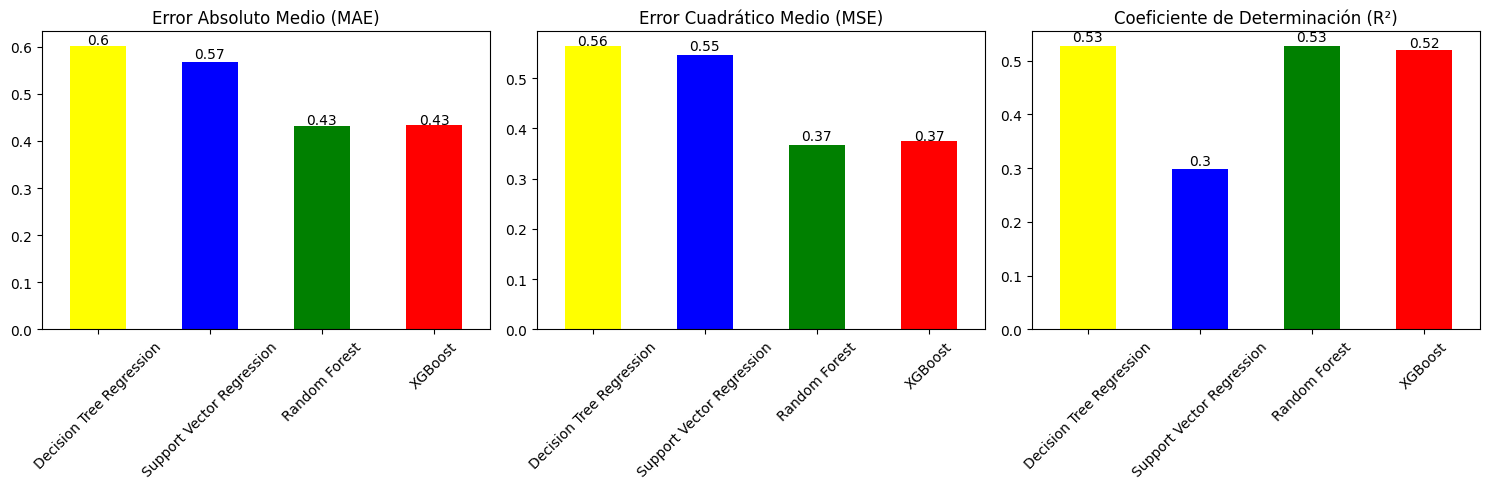

In [24]:
# Crear subgráficos
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Graficar cada métrica en un subplot con personalizaciones y etiquetas de datos
df_res.plot(x='Modelo', y='MAE', kind='bar', ax=axes[0], title='Error Absoluto Medio (MAE)', color=['yellow','blue', 'green', 'red'], legend=False)
axes[0].set_xlabel('')
axes[0].tick_params(axis='x', rotation=45)

# Agregar etiquetas de datos a cada barra, redondeadas a dos decimales
for p in axes[0].patches:
    height = round(p.get_height(), 2)
    axes[0].annotate(str(height), (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)

# Repetir el proceso para las otras métricas (MSE y R²) con los ajustes correspondientes
df_res.plot(x='Modelo', y='MSE', kind='bar', ax=axes[1], title='Error Cuadrático Medio (MSE)', color=['yellow','blue', 'green', 'red'], legend=False)
axes[1].set_xlabel('')
axes[1].tick_params(axis='x', rotation=45)
for p in axes[1].patches:
    height = round(p.get_height(), 2)
    axes[1].annotate(str(height), (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)

df_res.plot(x='Modelo', y='R²', kind='bar', ax=axes[2], title='Coeficiente de Determinación (R²)', color=['yellow','blue', 'green', 'red'], legend=False)
axes[2].set_xlabel('')
axes[2].tick_params(axis='x', rotation=45)
for p in axes[2].patches:
    height = round(p.get_height(), 2)
    axes[2].annotate(str(height), (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

plt.show()

### Conclusiones sobre los modelos creados:

Los cuatro algoritmos seleccionados han obtenido resultados que difieren en mas de 0.10 entre el mayor y menor valor, destacando el modelo creado con Random Forest por tener el menor error (MAE y MSE) y un mayor coeficiente de determinación. Por otro lado, los algoritmos que obutvieron el peor rendimiento son Decision Tree Regression (en términos de MAE y MSE) y Suport Vector Regression (en términos de R²). Cabe recorddar que este comportamiento no es absoluto, sino que puede variar de acuerdo al dataset y parametros incluidos en los algoritmos.

Es importante considerar que, antes de presentar un modelo final a emplear, se realicen multiples modificaciones en diversos aspectos de la construcción del modelo (selección de atributos, preprocesamiento de datos, algoritmos e hiperparámetros, etc), con el objetivo de alcanzar mejores resultados. 

## 2.4. Ejercicios Propuestos

Ejercicios Propuestos: <br>
Estas son algunas modificaciones recomendadas a realizar en el modelo desarrollado. Una vez ejecutadas (una, varias o todas), compare los resultados y revise si las métricas siguen siendo las mismas:
- Selección de atributos:
    - ¿Qué pasaría si, empleando la matriz de correlación, sólo seleccionamos los atributos que estan por arriba/debajo de un umbral, evitando los valores cercanos a cero? <br>
    Por ejemplo: Tomar atributos con valores >= 0.20 y <= -0.20 
- Preprocesamiento de datos:
    - ¿Qué pasaría si no se eliminan los valores vacíos?
    - ¿Qué pasaria si en lugar de label encoding, se hace one hot encoding con la variable nominal?
    - ¿Qué pasaría si no se hiciera normalización de variables? 
- Algoritmos empleados:
    - ¿Qué pasaría si modificamos los hiperparámetros de los algoritmos seleccionados?
    - Investigar y probar con otros algoritmos (regresión lineal, regresión múltiple, KNN Regression, AdaBoost, etc)
- Métricas:
    - ¿Que sucedería si el problema enfatiza más la penalización de errores grandes? ¿Y todos los errores en general?    